In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
ncp_df = pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')

In [29]:
ncp_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15.0,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  


In [59]:
#a. Find the 10 most common (known) recorded causes of death.

ncp_df_vc = ncp_df['Cause of Death/Burial'].value_counts()
#above shows only top and bottom few, so doing .head
ncp_df_vc.head(10)

Consumption     1767
Unknown         1260
Cholera         1242
Still Born       841
Not Known        639
Old Age          604
Pneumonia        516
Flux             469
Complication     446
Cold             421
Name: Cause of Death/Burial, dtype: int64

b. Clean up some of the misspellings. Use the replace method to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".

In [76]:
#based changes below on ncp_df_vc.head(40). have to re-do it after changes 

ncp_df = ncp_df.replace('Cholrea', 'Cholera')
ncp_df = ncp_df.replace('Colera*', 'Cholera', regex=True)
ncp_df = ncp_df.replace(['Still Born', 'Stil Born'], ['Stillborn', 'Stillborn'])
ncp_df = ncp_df.replace(['Not Known', 'Measels', 'Complicated', 'Teethin'], ['Unknown', 'Measles', 'Complication', 'Teething'])

In [81]:
ncp_df_vc2 = ncp_df['Cause of Death/Burial'].value_counts()
ncp_df_vc2.head(20)

Unknown           1899
Consumption       1767
Cholera           1242
Stillborn         1204
Complication       748
Old Age            604
Teething           552
Pneumonia          516
Flux               469
Measles            460
Cold               421
Typhoid Fever      310
Brain Fever        286
Dropsy             284
Whooping Cough     205
Small Pox          196
Scarlot Fever      192
Infl of Bowels     156
Dropsey            151
Feever             140
Name: Cause of Death/Burial, dtype: int64

   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

Text(0.5, 1.0, 'Top 10 Causes for Burial at Nash City Cem')

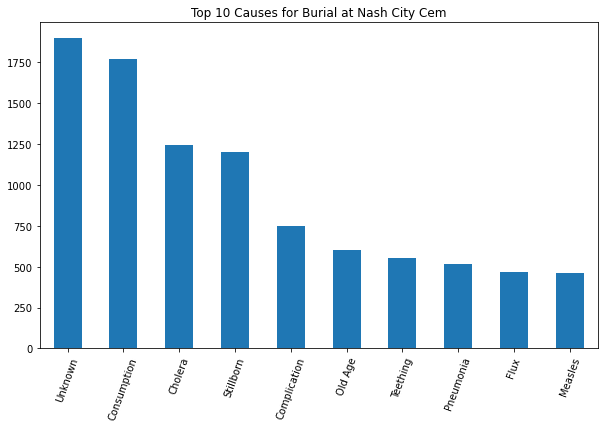

In [100]:
#creating a static, sorted top 10
ncp_df_vc2 = ncp_df_vc2.sort_values(ascending=False)
ncp_df_vc2 = ncp_df_vc2[0:10]
#did I need to do that? how would I limit to 10 on the graph if not?

plt.figure(figsize=(10, 6))
ncp_df_vc2.plot(kind='bar')
plt.xticks(rotation = 70)
plt.title('Top 10 Causes for Burial at Nash City Cem')

In [80]:
#search for a string. I was curious. Note that the wildcard ignores the F, returns *ver
# ncp_df[ncp_df['Cause of Death/Burial'].astype('string').str.contains('F*ver')]

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
167,6V,"Vaughn, Janie",Apr,4.0,18.0,1936.0,F,W,42.0,City,Liver,Cedar,NaN,Jany Vaughn grave on Cidar Ave
267,6P,"Pruett, Fred",Aug,8.0,11.0,1930.0,M,W,9.0,City,Run over by wagon,Magnolia,Lee,Fred Pruett grave on Lee lot
378,6P,"Phillips, Ray Lewis",Feb,2.0,18.0,1924.0,M,W,NaN,City,Fever,Willow,Handly,Ray Lewis Phillps grave on Handly lot
420,6T,"Taylor, Will Edward",Jul,7.0,16.0,1922.0,M,W,51.0,City,Typhard Fever,Mulberry,Clay,Will Edward Taylor grave on Clay lot
430,6F,"Fagan, Wesley P.",Oct,10.0,23.0,1922.0,M,W,34.0,City,Typhoid Fever,Maple,Cotten,Wesley P. Fagan grave on Cotten lot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,4-1846,"Koonrook, Myre",Sep,9.0,4.0,1846.0,M,W,50.0,City,Feever,Central,200.0,NaN
19724,4-1846,"Alloway, John",Sep,9.0,14.0,1846.0,M,W,57.0,City,Feever,Cedar,lot,deposited in McNairy vault
19725,4-1846,"Bowman, Henry",Sep,9.0,16.0,1846.0,M,W,30.0,City,Feever,Central,200.0,NaN
19738,4-1846,Emmily,Sep,9.0,25.0,1846.0,F,B,16.0,City,Feever,Poplar,200.0,slave to J. Chappell
